In [1]:
import collections
from itertools import combinations
import pickle

In [10]:
def flatten(it):
    for x in it:
        if (isinstance(x, collections.Iterable) and
            not isinstance(x, tuple) and
            not isinstance(x, str)):
            yield from flatten(x)
        else:
            yield x

The streak.pickle file can be found on gDrive, in `data/pmi computation/`

In [9]:
streaks = pickle.load(open('../data/streaks.pickle', 'rb'))

In [4]:
streaks[0:1]

[[Unnamed: 0                3
  lineID                    4
  day                       1
  pid                    1145
  adFlag                    1
  availability              1
  competitorPrice        6.59
  click                     0
  basket                    0
  order                     1
  price                  6.55
  revenue                6.55
  manufacturer             52
  group              18OZ00IS
  content                  60
  unit                      G
  pharmForm               GEL
  genericProduct            0
  salesIndex               40
  category                 25
  campaignIndex           NaN
  rrp                    9.31
  Name: 3, dtype: object, Unnamed: 0             4
  lineID                 5
  day                    1
  pid                 3394
  adFlag                 0
  availability           1
  competitorPrice     4.39
  click                  0
  basket                 0
  order                  1
  price               4.14
  revenue          

In [12]:
for strk in streaks:
    for i, item in enumerate(strk):
        strk[i] = item.loc['group'].lower()

In [8]:
streaks

[['18oz00is', '20oi0', '13ox06', '13ok0fok'],
 ['13oz0eoi', '13oi0eih', '22oi5'],
 ['1coi0fko', '22oz1', '10oi03ii', '21oig'],
 ['10ok0f',
  '18oi0eoi',
  '18oi0eoi',
  '1coi02oi',
  '22oif',
  '1coj00oz',
  '10ot30ok',
  '2foi',
  '2foi',
  '2foi',
  '22oh',
  '2foi',
  '10oi01ok'],
 ['22oi3'],
 ['21okg', '20oz1', '1eoh20oz'],
 ['21oig'],
 ['10ii30ok', '18oi0eoi', '10iz22ko', '1doif0zo', '1doif0zo'],
 ['10oj01oz'],
 ['2foi', '2foi', '2foi', '1coj0eot', '13oz0esi'],
 ['20ohg', '22oik', '1coj00oz', '13oz0f', '22oi7', '13oz0f'],
 ['1coj00oz'],
 ['18oi0eoi', '1coj0eot', '20oh4'],
 ['19oz1eoi', '17ok0', '14oz2f', '24oi'],
 ['10ot30ok',
  '10oi00oz',
  '10ot20',
  '21ok2',
  '14oi0fih',
  '2foi',
  '21okg',
  '22oi8',
  '18oi',
  '10iz21oz',
  '21ok3'],
 ['21oi0', '21oi0'],
 ['21okg'],
 ['10ii31',
  '20oh3',
  '20oh3',
  '1coi00ot',
  '1cos20',
  '10ii31',
  '1coi10sz',
  '1coi00ot'],
 ['21ok3', '2foz', '2foi', '2foi', '2foi', '21ok3', '21okg'],
 ['1doif0iz', '22oz1', '2e', '10otf0oz', '10o

In [13]:
joint_counts = collections.Counter(flatten((p for p in combinations(strk, 2)) for strk in streaks))
prior_counts = collections.Counter(flatten((x for x in strk) for strk in streaks))

At this point `joint_probs` and `prior_probs` only holds counts, not probabilities.

Now to make probabilities of these counts

In [14]:
all_pairs_total_count = sum(joint_counts.values())
orders_total_count = sum(prior_counts.values())

joint_probs = {}
prior_probs = {}

for pair, count in joint_counts.items():
    joint_probs[pair] = count / all_pairs_total_count
    
for item, count in prior_counts.items():
    prior_probs[item] = count / orders_total_count

In [15]:
print(sum(joint_probs.values()))
print(sum(prior_probs.values()))

0.9999999999998994
1.0000000000000002


In [16]:
from math import log
pmi = collections.Counter({(x,y): log(joint_probs[(x,y)] / (prior_probs[x]*prior_probs[y])) for x,y in joint_probs.keys()})

In [17]:
[x[0] for x in pmi.most_common(20)]

[('13ii0foz', '13ii0foz'),
 ('21oz2', '21oz2'),
 ('21oz3', '21oz3'),
 ('20oh1', '20oh1'),
 ('14oi0fiz', '14oi0fiz'),
 ('1doi40sz', '21oz3'),
 ('11ok0eoi', '10ii20oi'),
 ('10ii50oh', '10ii50oi'),
 ('1cos', '10ii10'),
 ('10ii30oi', '11ok03'),
 ('11ok01', '18oz'),
 ('10oj01ot', '10oj01os'),
 ('20oh9', '20oh9'),
 ('19oi11sz', '13ox07'),
 ('12io0foj', '10ot12oi'),
 ('10oj01ot', '12os10oi'),
 ('10ik', '19os2'),
 ('1aok02oi', '1aok02sz'),
 ('20oz0', '20oz0'),
 ('14oi0f', '13oj11oj')]

In [18]:
max([joint_counts[x[0]] for x in pmi.most_common(20000)])

12148

Would be interesting to see if the correlated / anti-correlated items include items that belong to the same unified_pid / cluster.

In [26]:
with open('group_pmi.pickle', 'wb') as f:
    pickle.dump(pmi, f)

In [19]:
len(pmi)

73878

In [20]:
import matplotlib.pyplot as plt

In [21]:
sjp = sorted(joint_probs.values(),reverse=True)
spp = sorted(prior_probs.values(), reverse = True)
spmi = sorted(pmi.values(), reverse = True)

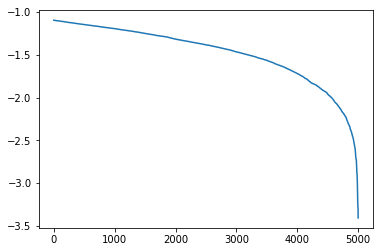

In [25]:
num = 5000
plt.plot(range(num), spmi[-num:])
plt.show()

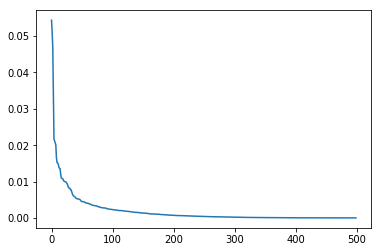

In [23]:
plt.plot(range(num), spp[:num])
plt.show()